<a href="https://colab.research.google.com/github/KasturiDisale/Info-Viz--HRA-Analyzing-and-Visualizing-Google-Analytics-Data-for-HRA-User-Interfaces/blob/main/Project_INFO_VIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/20250212-hra-export.csv")  # Replace with the actual filename


In [ ]:
df.describe()

user_pseudo_id    event_date  user_first_touch_timestamp  \
count    2.508530e+05  2.508530e+05                2.344690e+05   
mean     9.134415e+08  2.024813e+07                1.725401e+15   
std      6.876223e+08  3.727307e+03                2.030068e+13   
min      2.307182e+05  2.024121e+07                1.629140e+15   
25%      3.092871e+08  2.025010e+07                1.724182e+15   
50%      6.690593e+08  2.025012e+07                1.735340e+15   
75%      1.537702e+09  2.025013e+07                1.737054e+15   
max      2.147207e+09  2.025021e+07                1.739336e+15   

       event_timestamp  
count     2.508530e+05  
mean      1.737050e+15  
std       1.446123e+12  
min       1.734071e+15  
25%       1.735773e+15  
50%       1.736977e+15  
75%       1.738331e+15  
max       1.739336e+15

In [ ]:
# Find null values
null_counts = df.isnull().sum()
print(null_counts)

user_pseudo_id                    0
hostname                       1684
page_location                     0
event_date                        0
user_first_touch_timestamp    16384
event_timestamp                   0
event_name                        0
event_category                42170
event_label                   44364
dtype: int64


In [ ]:
# Remove rows with any null values
df = df.dropna()

# Now you can continue working with the DataFrame without null values.
# For example, you can check if there are nulls again:
null_counts = df.isnull().sum()
print(null_counts)


user_pseudo_id                0
hostname                      0
page_location                 0
event_date                    0
user_first_touch_timestamp    0
event_timestamp               0
event_name                    0
event_category                0
event_label                   0
dtype: int64


1. Statistics: Event Frequency & UI Button Clicks

Bar Chart (Event Frequency)

<ipython-input-36-40022894df0f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


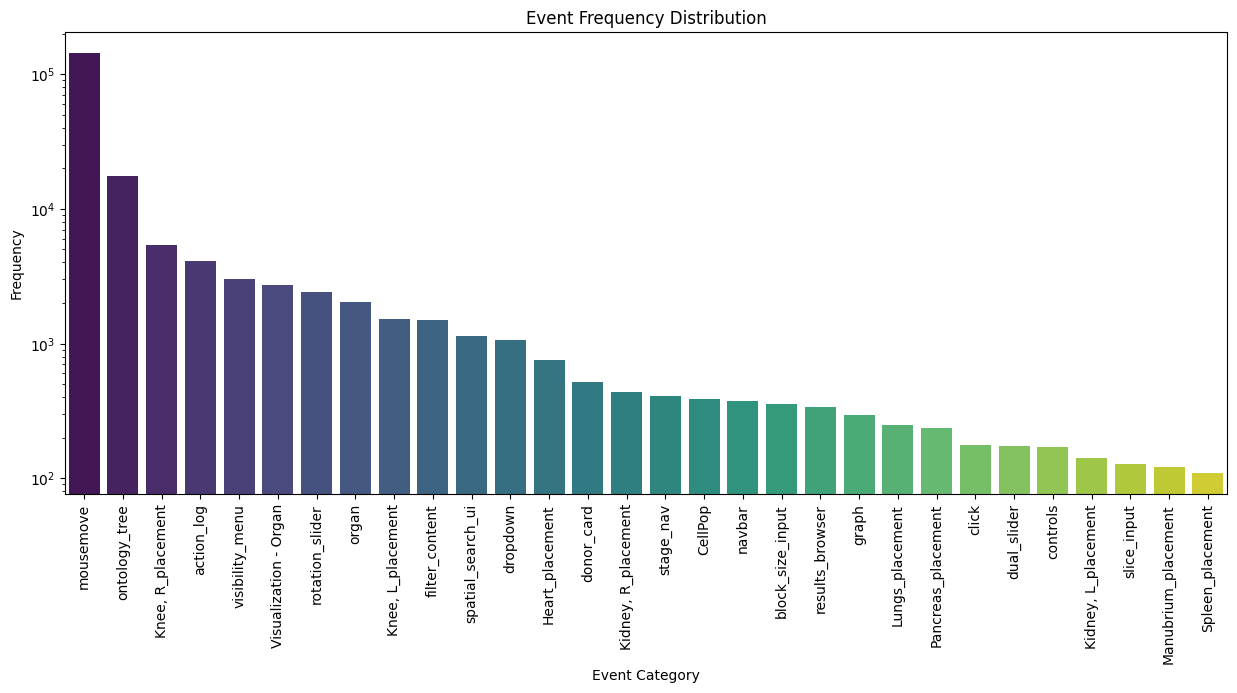

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by event category
event_counts = df['event_category'].value_counts()
event_counts = event_counts[event_counts > 100 ]
# Plot
plt.figure(figsize=(15,6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel("Event Category")
plt.ylabel("Frequency")
plt.title("Event Frequency Distribution")
plt.show()


2. Temporal: Event Distribution Over Time

Time-Series Line Chart

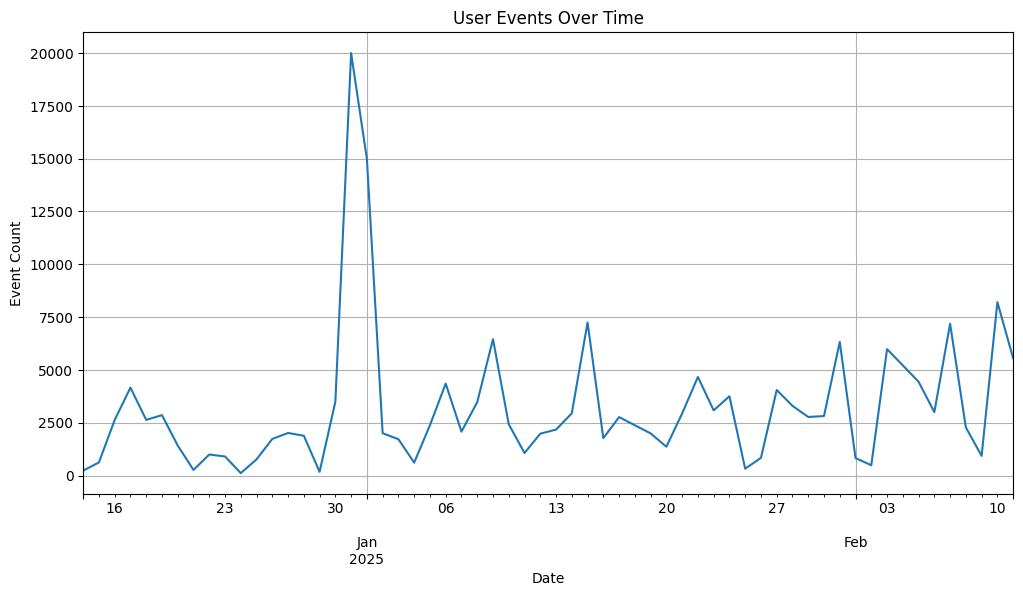

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

# Group by date
time_series = df.groupby('event_date').size()

# Plot
plt.figure(figsize=(12,6))
time_series.plot()
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.title("User Events Over Time")
plt.grid()
plt.show()


Heatmap (Time-of-Day Analysis)

3. Spatial: UI Element Usage

Heatmap of Clicks on UI

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 32472 (\N{CJK UNIFIED IDEOGRAPH-7ED8}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 36873 (\N{CJK UNIFIED IDEOGRAPH-9009}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarni

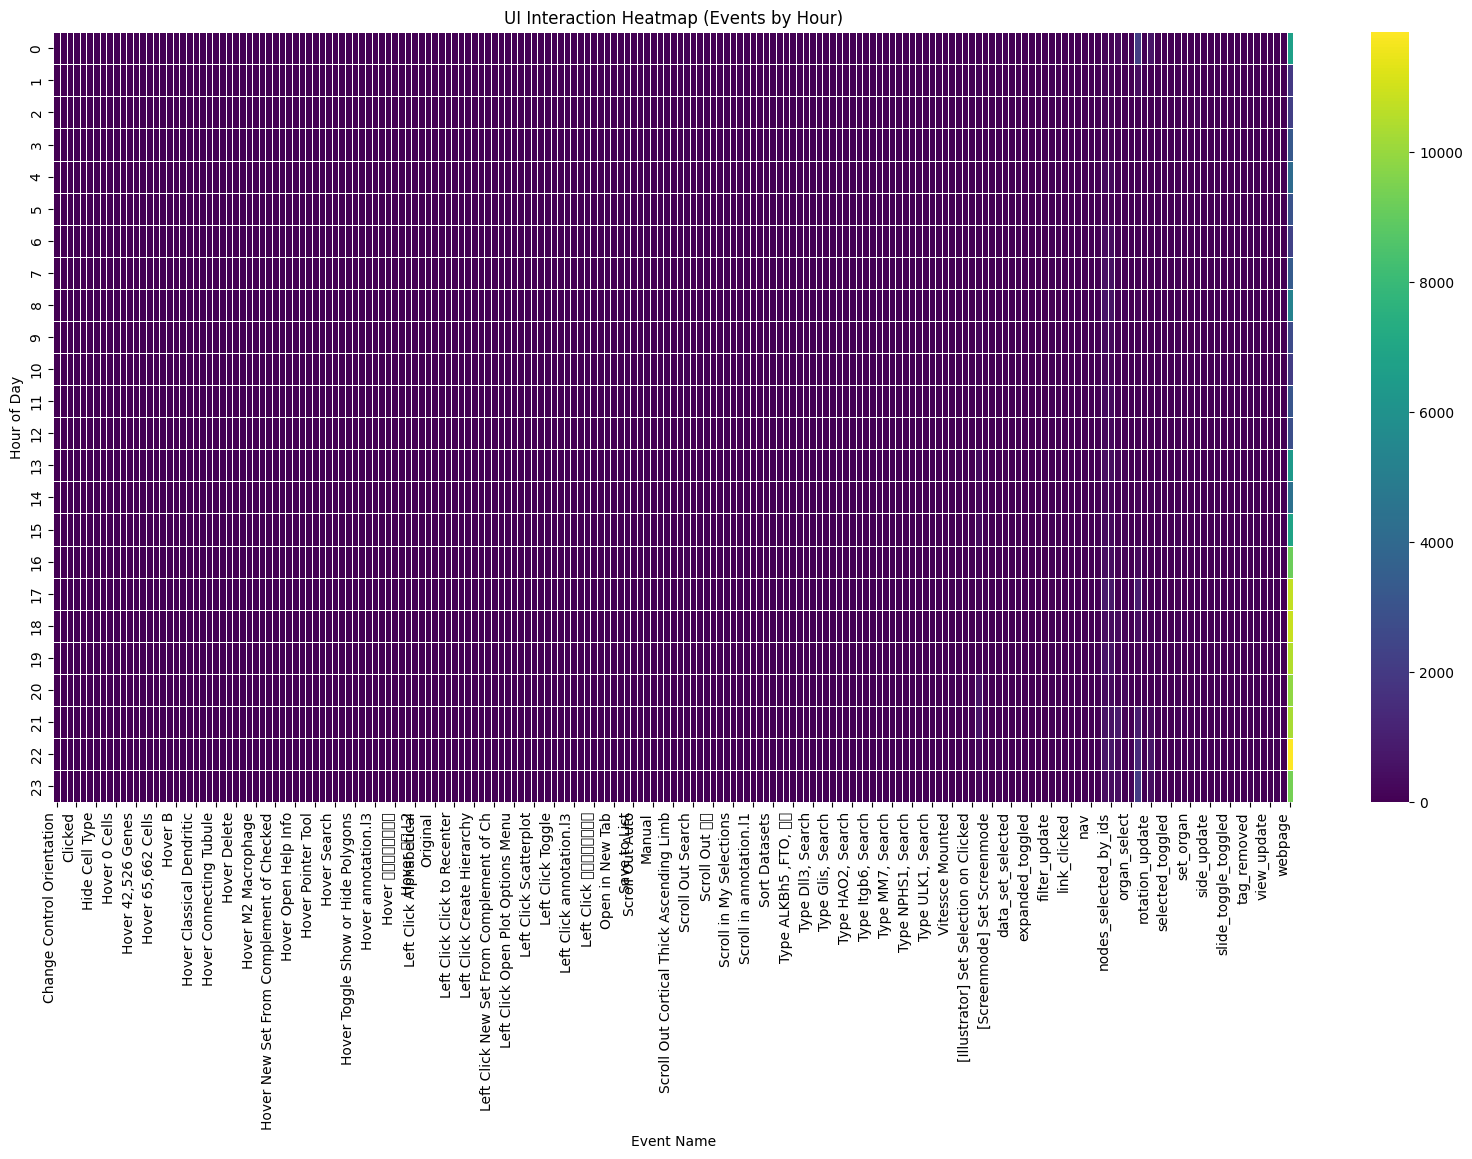

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure event_timestamp is correctly converted
df['event_timestamp'] = pd.to_numeric(df['event_timestamp'], errors='coerce')
df = df.dropna(subset=['event_timestamp'])

# Convert timestamp to datetime and extract hour
if df['event_timestamp'].max() > 10**15:  # If in microseconds
    df['event_timestamp'] //= 1_000_000
elif df['event_timestamp'].max() > 10**12:  # If in milliseconds
    df['event_timestamp'] //= 1_000

df['hour'] = pd.to_datetime(df['event_timestamp'], unit='s', errors='coerce').dt.hour

# Create pivot table for heatmap (event counts per hour)
heatmap_data = df.pivot_table(index='hour', columns='event_name', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="viridis", linewidths=0.5)
plt.title("UI Interaction Heatmap (Events by Hour)")
plt.xlabel("Event Name")
plt.ylabel("Hour of Day")
plt.xticks(rotation=90, ha="right")
plt.show()


4. Networks: User Interaction Flow

State Transition Diagram (Markov Chain)

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25628 (\N{CJK UNIFIED IDEOGRAPH-641C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27880 (\N{CJK UNIFIED IDEOGRAPH-6CE8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

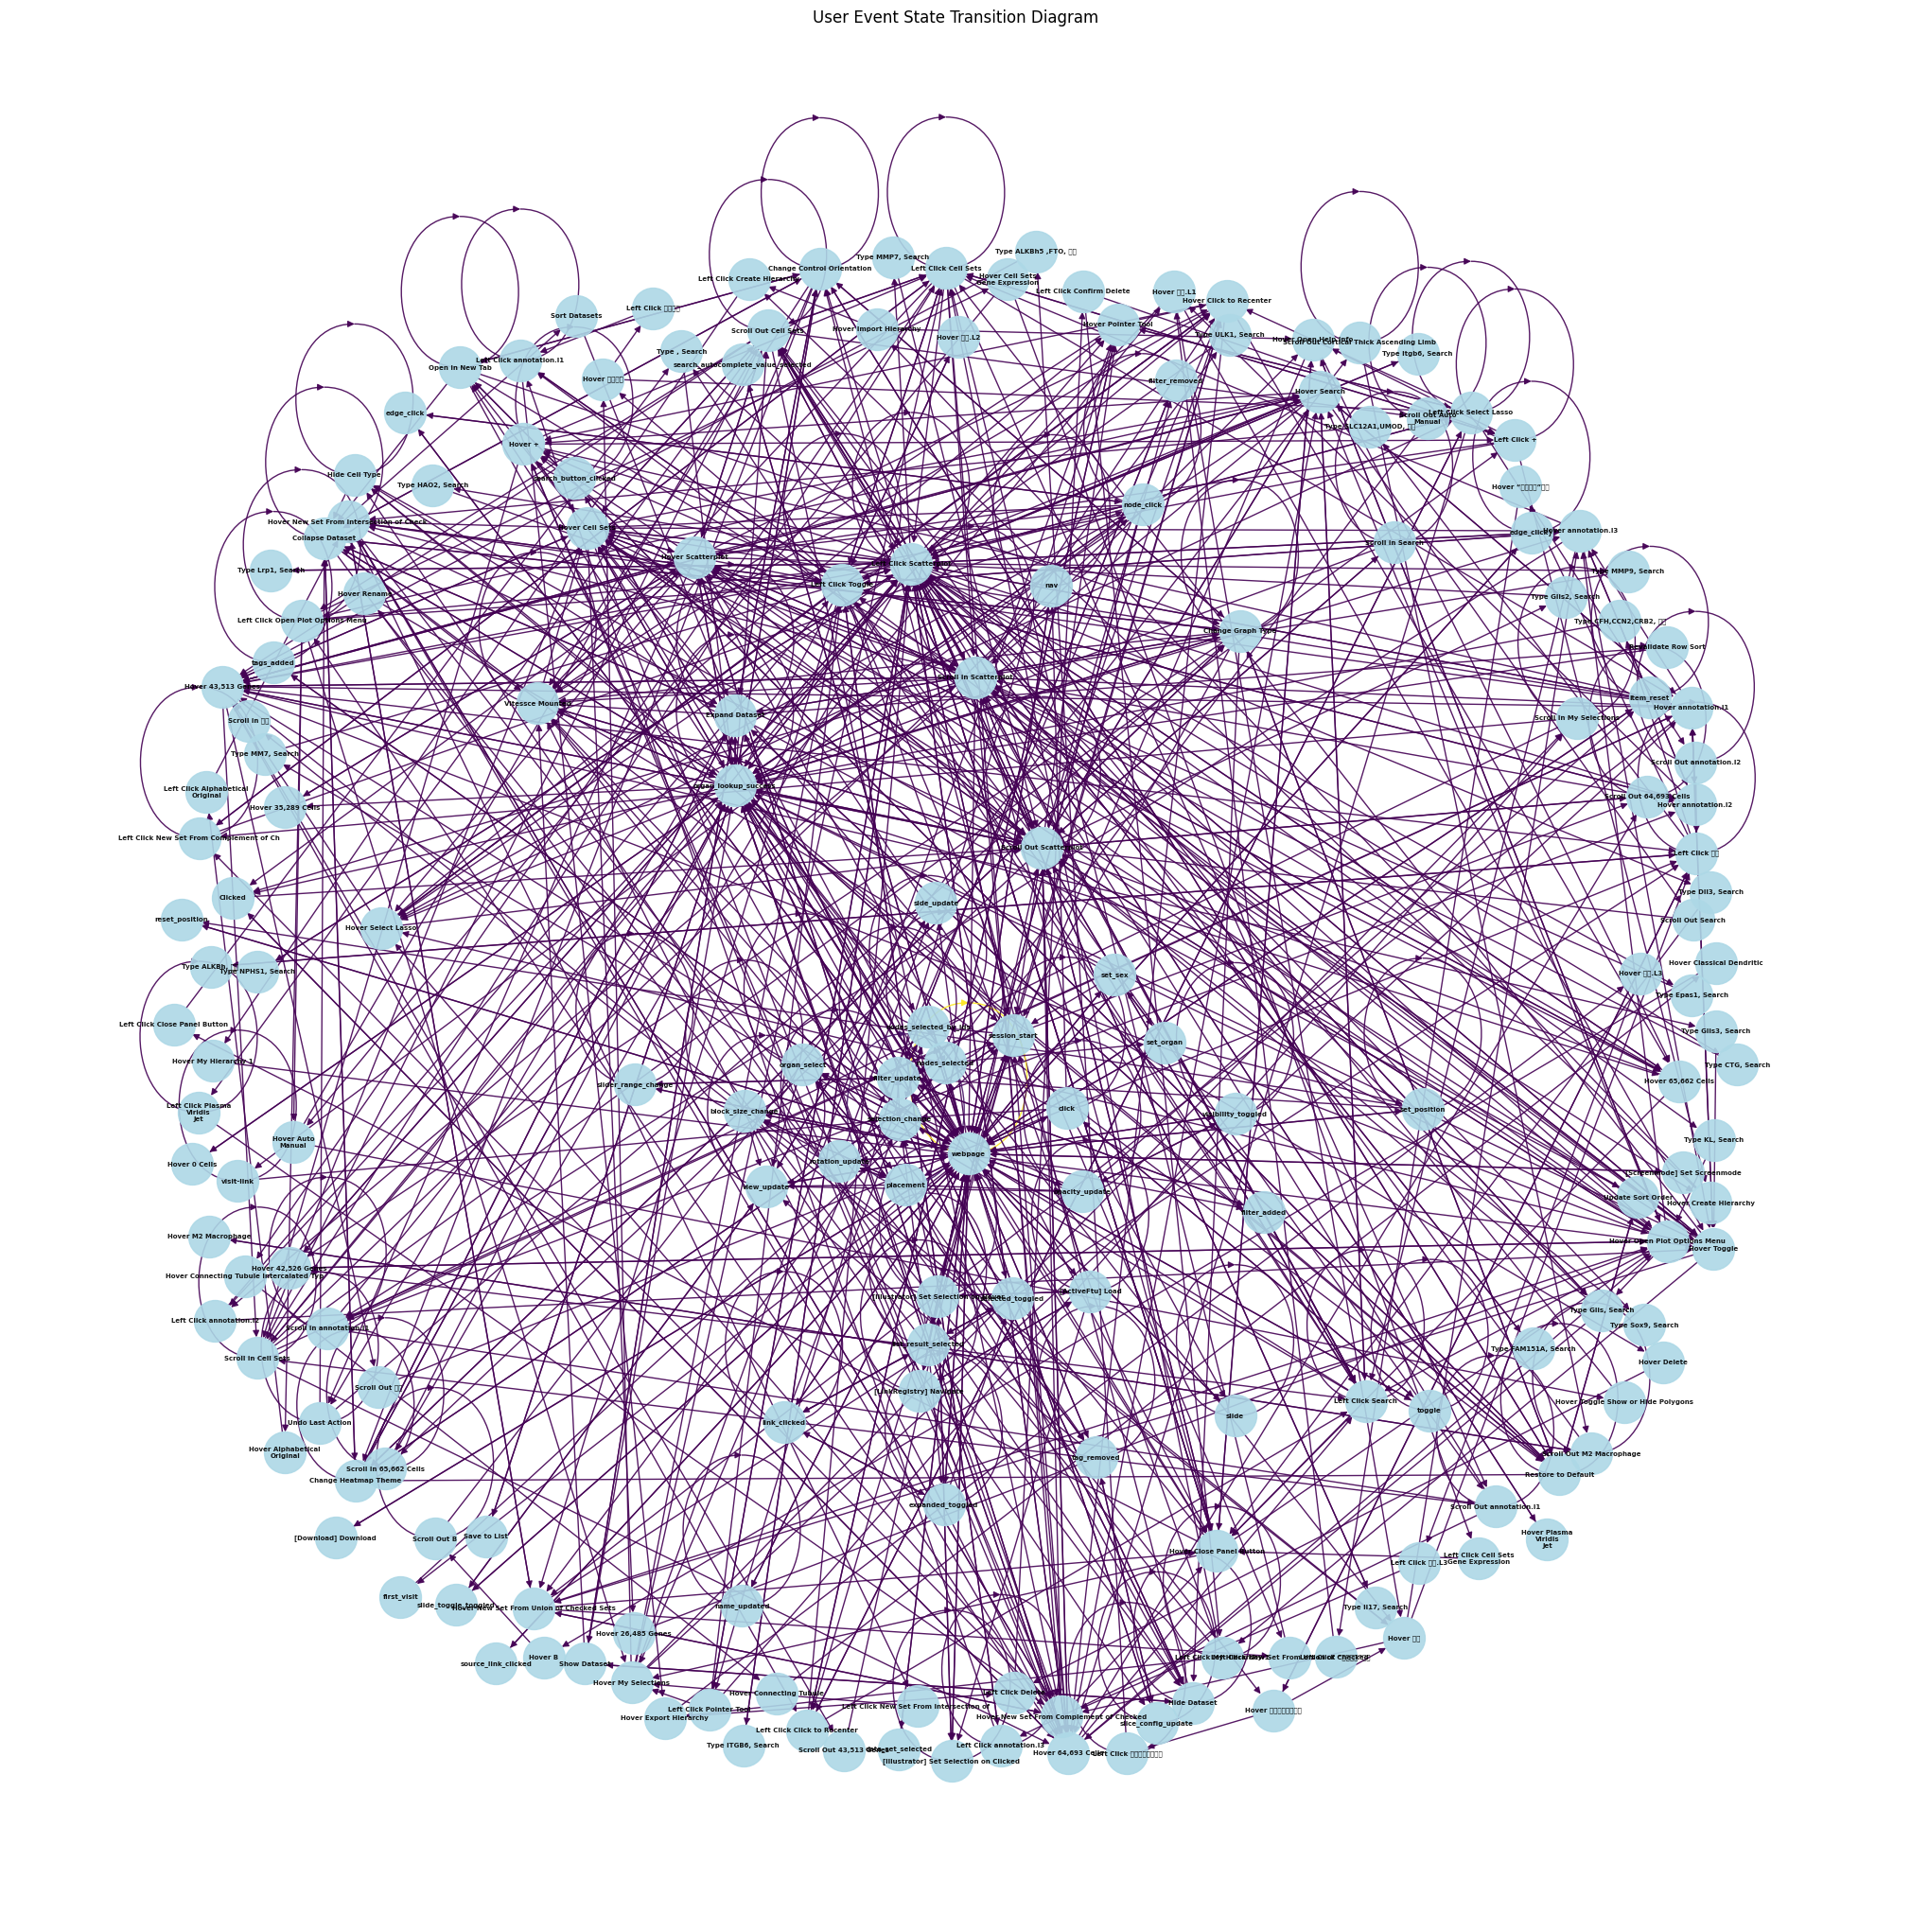

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create state transition pairs per user
df_sorted = df.sort_values(by=['user_pseudo_id', 'event_timestamp'])
df_sorted['next_event'] = df_sorted.groupby('user_pseudo_id')['event_name'].shift(-1)
transitions = df_sorted.groupby(['event_name', 'next_event']).size().reset_index(name='count')

# Create directed graph
G = nx.DiGraph()
for _, row in transitions.iterrows():
    G.add_edge(row['event_name'], row['next_event'], weight=row['count'])

# Plot with spring layout but with smaller nodes and more distance
plt.figure(figsize=(20,20))

pos = nx.spring_layout(G, k=2, seed=42)

# Using spring layout and adjusting the k value for more distance between nodes
#pos = nx.spring_layout(G, k=0.3, seed=42)  # Adjust 'k' to make nodes more distant

# Draw the graph with smaller nodes and better spacing
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", edge_color=weights,
        width=1, cmap=plt.cm.Blues, font_size=5, font_weight='bold', alpha=0.9)

plt.title("User Event State Transition Diagram")
plt.show()


Sankey Diagram (Flow of User Interactions)

In [ ]:
import plotly.graph_objects as go

# Create transition data
source = transitions['event_name']
target = transitions['next_event']
value = transitions['count']

# Limit the number of unique events if needed (e.g., top 10 events)
top_events = transitions.groupby('event_name').sum().nlargest(10, 'count').index
filtered_transitions = transitions[transitions['event_name'].isin(top_events) & transitions['next_event'].isin(top_events)]

# Recreate the source, target, and value for the filtered transitions
source = filtered_transitions['event_name']
target = filtered_transitions['next_event']
value = filtered_transitions['count']

# Create the node labels
unique_labels = list(set(source).union(set(target)))

# Plot
fig = go.Figure(go.Sankey(
    node=dict(
        label=unique_labels,
        pad=15,               # Increase the padding between nodes
        thickness=20,         # Increase the thickness of the nodes
        line=dict(color="black", width=0.5),  # Add border around the nodes
    ),
    link=dict(
        source=[unique_labels.index(s) for s in source],
        target=[unique_labels.index(t) for t in target],
        value=value,
        color='rgba(0, 153, 255, 0.5)'  # Link color to enhance visual appeal
    )
))

fig.update_layout(
    title_text="User Navigation Flow (Top 10 Events)",
    font_size=12,
    title_x=0.5,
    title_y=0.95,
)

fig.show()


5. Additional Insights

Bar Chart (Event Count Per Hostname)

<ipython-input-72-bdd51f9c42d8>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




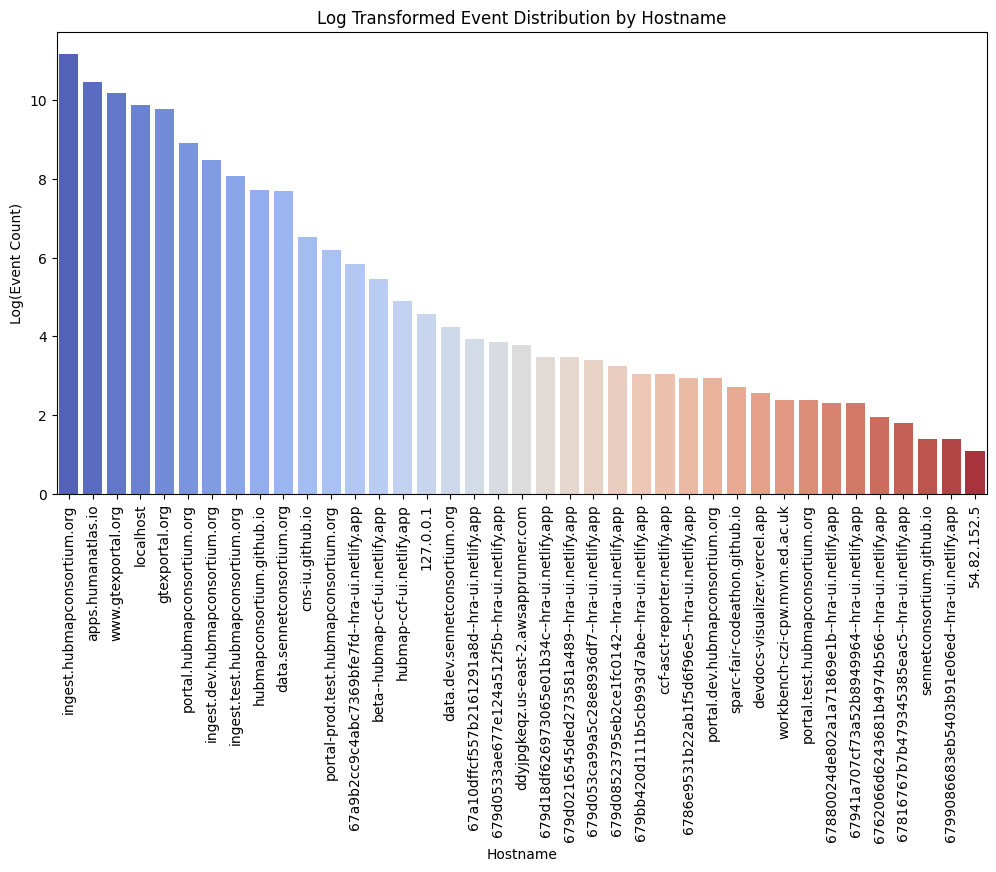

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the event count per hostname
hostname_counts = df['hostname'].value_counts()

# Apply log transformation to the event counts
log_hostname_counts = np.log1p(hostname_counts)  # Using log1p to handle zero counts safely

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=log_hostname_counts.index, y=log_hostname_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Hostname")
plt.ylabel("Log(Event Count)")
plt.title("Log Transformed Event Distribution by Hostname")
plt.show()


Histogram (Session Durations)

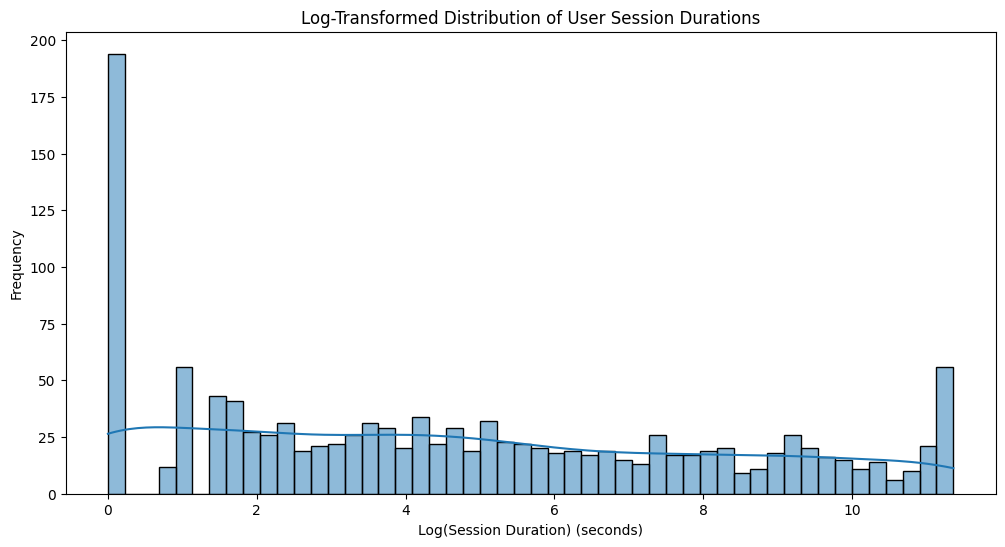

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate session length per user
session_durations = df.groupby('user_pseudo_id').timestamp.agg(lambda x: (x.max() - x.min()).seconds)

# Apply log transformation to the session durations
log_session_durations = np.log1p(session_durations)  # Using log1p to handle zero durations safely

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(log_session_durations, bins=50, kde=True)
plt.xlabel("Log(Session Duration) (seconds)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of User Session Durations")
plt.show()


Stacked Bar Chart (Event Types Per Hostname)

<ipython-input-80-2f250773cd3f>:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



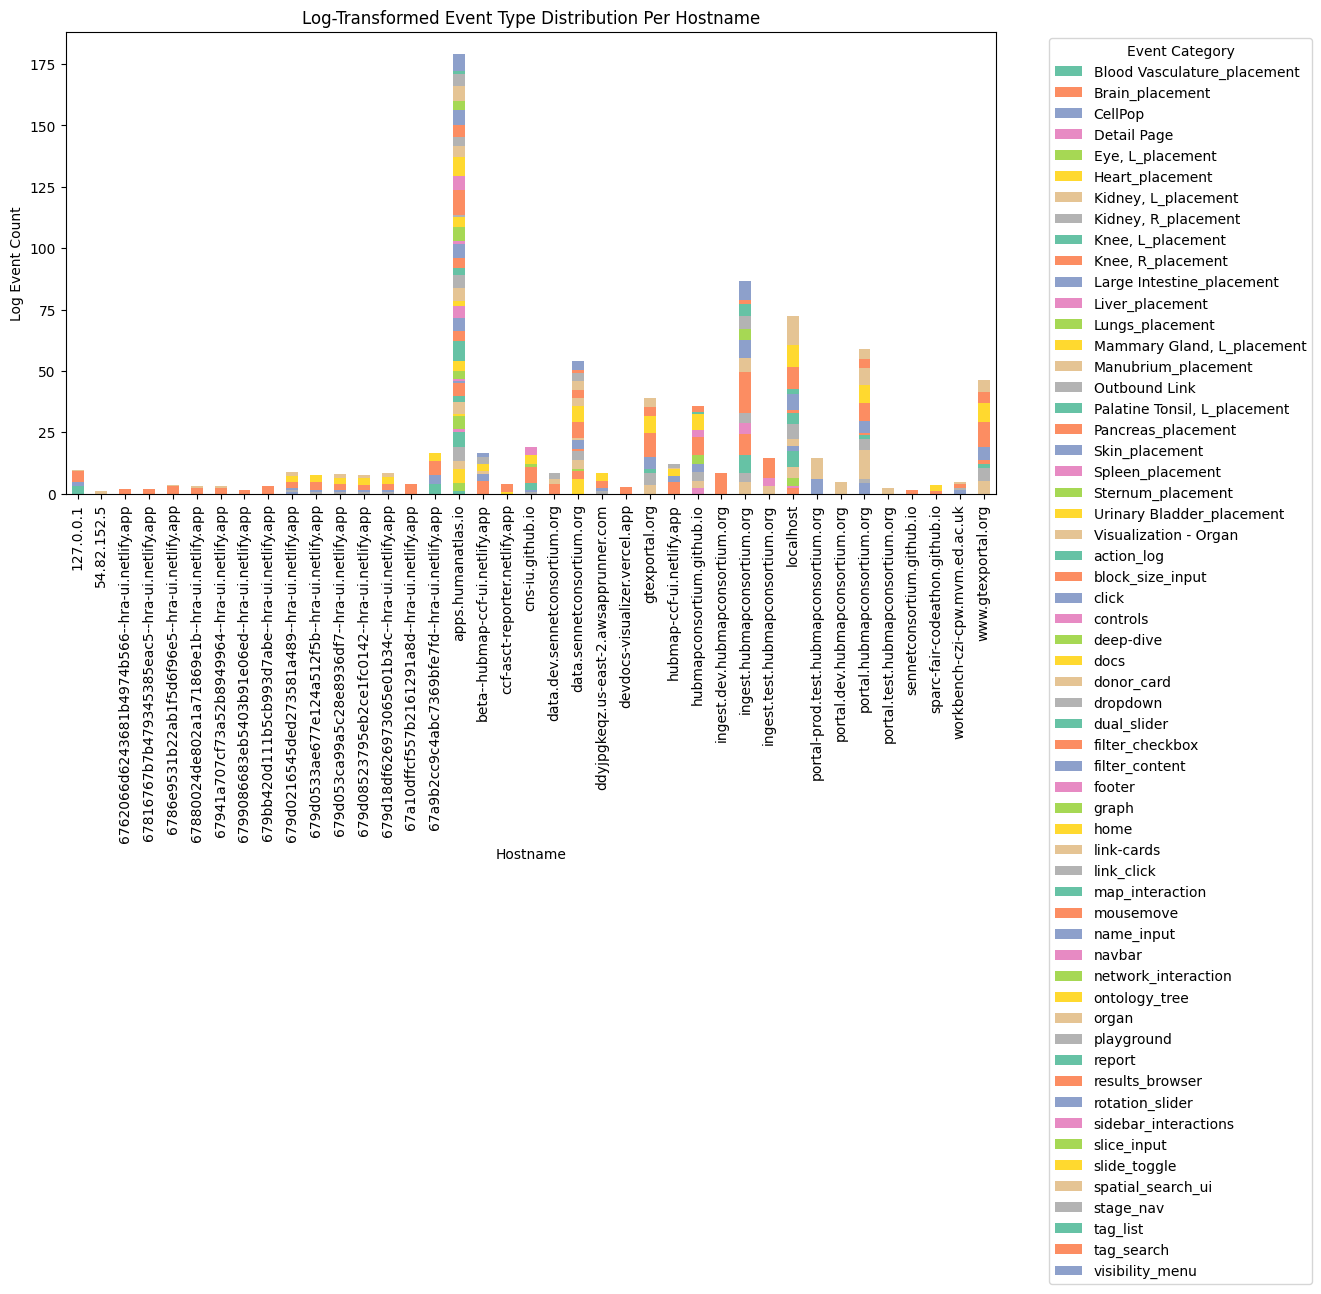

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'hostname' and 'event_category' and calculate event counts
hostname_event_counts = df.groupby(['hostname', 'event_category']).size().unstack(fill_value=0)

# Remove hostnames with no event counts across all categories
hostname_event_counts = hostname_event_counts.loc[hostname_event_counts.sum(axis=1) > 0]

# Apply log transformation to the event counts
log_hostname_event_counts = np.log1p(hostname_event_counts)

# Define distinct colors for each event category manually
# Here we create a list of distinct colors (you can customize it further)
distinct_colors = sns.color_palette("Set2", len(log_hostname_event_counts.columns))

# Plot with distinct colors
ax = log_hostname_event_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=distinct_colors)

# Adjust legend position and size
plt.legend(title="Event Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust x-ticks to remove hostnames with no events
plt.xlabel("Hostname")
plt.ylabel("Log Event Count")
plt.title("Log-Transformed Event Type Distribution Per Hostname")
#plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout to fit the plot
plt.show()
